In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
os.chdir('..')
import rwpropa as rw

## Simulation setup

#### Start simulation setup

The software is modular. After initializing the simulation, we can add the indvidual modules as needed.
Important modules are:
- source
- magnetic field
- propagator
- observer

Each module contains special classes for different use cases. In the first tutorial, we only use basic classes to demonstrate the basic usage of the propagation software. In the following tutorials, each module with its special classes will be explained in detail. For example, there exist many different observer types such as time evolution observers (lin or log spcaing) and sphercial observers. 

In [2]:
sim = rw.Simulation()

start simulation


#### Source 

First, we have to define a source of particles that we want to propagate. The simples source type is the point source that emmits particles isotropically. The only user-specifyed parameters are:

- **energy**: Energy of the particles in eV.
- **source posistion**: The position of the point source.
- **number of particles**: Number of particles that should be emitted from this source.

The source can be easily added to the simulation. Afterwards, calling the description on the source of the simulation prints all relevant information and the values of the source parameters.

In [9]:
nr_particles = 5*10**3
source_pos = np.array([0.0, 0.0, 0.0], dtype=np.float32)
energy = 3*10**15 # eV

source = rw.PointSourceIsotropic(energy, source_pos, nr_particles)
sim.add_source(source)
sim.source.get_description()

Description Source:
                The source defines the start conditions of the particles 
                and covers the position, direction, energy, etc

position:  [0. 0. 0.]
number particles:  5000
energy:  3000000000000000  eV
source tpye: PointSourceIsotropic


In [4]:
nr_particles = 1*10**3
source_pos = np.array([0.0, 0.0, 0.0], dtype=np.float32)
delta_rho_div_phi = 1 #1/2**0.5 # (delta_r_rho / delta_r_phi)
energy = 3*10**15 # eV
phi = 0.0
pitch_angle = 2*np.pi * 54.74/360 # pitch angle for equal components in all directions
        

source = rw.PointSourceOriented(energy, source_pos, nr_particles, pitch_angle, phi)
sim.add_source(source)
sim.source.get_description()

Description Source:
                The source defines the start conditions of the particles 
                and covers the position, direction, energy, etc

position:  [0. 0. 0.]
number particles:  1000
energy:  3000000000000000  eV
source tpye: PointSourceOriented
pitch angle:  0.955393232541696
phi:  0.0


#### Propagator

Propagates particles via a correlated rrandom walk. The overall behaviour is governed by a generalized telegraph equation: $\frac{\partial f}{\partial t} = \sum_i \tau_i \frac{\partial^2 f}{\partial t^2} = \sum_i \kappa_i \frac{\partial^2 f}{\partial x_i^2}$.

Here, we use isotropic diffusion for simplicity that propagates particles using a correlated random walk in Cartesian coordinates. Isotropic diffusion is given when the turbulence is isotropic and there is no background field. In the following tutorials also the anisotropic diffusion is used. The only user-specifyed parameters for the simple case of isotropic diffusion are:

- **mean-free paths**: The mean-free paths $\lambda_i$ can be derived from the diffusion coefficients $\kappa_i$ via $\lambda_i = 3 \kappa_i/c$. Therfore, the diagonal elements of the diagonalized diffusion tensor are needed to determine the characteristics of the transport. For isotropic diffusion all diffusion coefficients are equal $\kappa = [\kappa_{xx}, \kappa_{yy}, \kappa_{zz}]$ with $\kappa_{xx}=\kappa_{yy}=\kappa_{zz}$. Typical free-mean paths of charged particles in plasmoids in AGN jets are $10^{12}$m (see Reichherzer et al. (2021)).
- **number of steps**: The number of simulation steps for each individual particle.
- **step size**: Size of an individual step. Together with the parameter number of steps, the step size determines the trajectory length of the particles. 

The propagator can be easily added to the simulation. Afterwards, calling the description on the propagator of the simulation prints all relevant information and the values of the propagation parameters.

In [10]:
nr_steps = 2*10**3
step_size = 0.5*10**10 # [m]
diffusion_coefficient = 5*10**18 # [m^2/s]
speed_of_light = 3*10**8 # [m/s]
mfp_iso = 3*diffusion_coefficient/speed_of_light
mfp = np.array([10**11, 10**11, 10**11], dtype=np.float32)  # [m]
rms = 1 # Gaus
magnetic_field = rw.OrderedBackgroundField(rms, [0,0,1]).magnetic_field

propagator = rw.IsotropicPropagator( mfp, nr_steps, step_size)
sim.add_propagator(propagator)
sim.propagator.get_description()

Propagator initialized
Description Propagator:
                The propagator is responsible for the movement of the particles. 
                It performs the change of direction and the movement in the respective direction.
                There are two phases:
                 - change direction with probability (see below)
                 - move in all directions
                The movement takes place according to the random walk (RW).

propagation tpye: IsotropicPropagator
Description Propagator:
                The propagator is responsible for the movement of the particles. 
                It performs the change of direction and the movement in the respective direction.
                There are two phases:
                 - change direction with probability (see below)
                 - move in all directions
                The movement takes place according to the random walk (RW).

coordinates: Cartesian coordinates
dimensions:  3
pitch angle: constant
particle speed:

#### Observer

In [11]:
substeps = [False, False, True] # observe only steps (no substeps)
min_step = 1
max_step = nr_steps
nr_obs_steps = 200

observer = rw.TimeEvolutionObserverLog(min_step, max_step, nr_obs_steps, substeps)

sim.add_observer(observer)
sim.observer.get_description()

Observer initialized
Description Observer:
                The observer defines the conditions for when to write data to the output.

observer tpye: TimeEvolutionObserverLog
spheres:  [-1.]
steps [0:10]:  [ 1  2  3  4  5  6  7  8  9 10]
steps [-11:-1]:  [1365 1418 1473 1530 1590 1652 1716 1783 1852 1925]
nr steps:  139
substeps:  [False False  True]
all_steps:  False


In [12]:
%time sim.run_simulation()
sim.save_data('data/data_sim')

CPU times: user 56.8 s, sys: 184 ms, total: 57 s
Wall time: 57.1 s


## Analyze statistics


init statistics plotting class


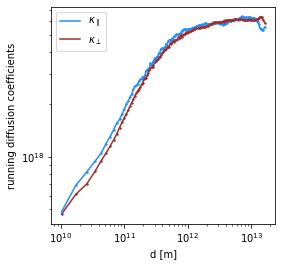

            id       i             d             x             y  \
0          0.0     1.0  1.716476e+10  6.267831e+09  6.267831e+09   
1          0.0     2.0  2.574714e+10  9.401746e+09  9.401746e+09   
2          0.0     3.0  3.432953e+10  1.253566e+10  1.253566e+10   
3          0.0     4.0  4.291191e+10  1.566958e+10  1.566958e+10   
4          0.0     5.0  5.149429e+10  1.880349e+10  1.880349e+10   
...        ...     ...           ...           ...           ...   
694995  4999.0  1716.0  1.193091e+13  4.007745e+11  1.570152e+11   
694996  4999.0  1783.0  1.239648e+13  4.128528e+11  1.603092e+11   
694997  4999.0  1852.0  1.287596e+13  4.886164e+11  8.674279e+10   
694998  4999.0  1925.0  1.338323e+13  4.919104e+11  1.229770e+11   
694999  4999.0  2000.0  1.390440e+13  4.798322e+11  1.965434e+11   

                   z       phi  pitch_angle  radius  sub_step  
0       4.629102e+09  0.750649     1.089521    -1.0       2.0  
1       6.943652e+09  0.750649     1.089521    -1.0    

In [13]:
df = pd.read_pickle("data/data_sim.pkl")
df_time_evolution_observer = df.loc[df['radius'] == -1.0]
sta = rw.Statistics(df_time_evolution_observer)
errors = False
df_kappas = sta.plot_diffusion_coefficients(errors)
print(df)

/home/patrick/.local/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1870: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


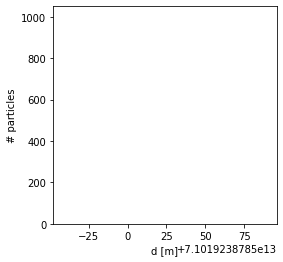

In [8]:
bins = 30
file_name = None
df_kappas = sta.plot_distribution('d', -1, bins, file_name)

In [9]:
df = pd.read_pickle("data/data_sim.pkl")
df

,id,i,d,x,y,z,phi,pitch_angle,radius,sub_step
0,0.0,0.0,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN
1,0.0,1.0,7.440121e+09,-4.808898e+07,2.356869e+09,1.666306e+09,0.040801,0.955393,-1.0,2.0
2,0.0,2.0,1.488024e+10,-1.922698e+08,4.709815e+09,3.332611e+09,0.081602,0.955393,-1.0,2.0
3,0.0,3.0,2.232036e+10,-4.323117e+08,7.054922e+09,4.998917e+09,0.122403,0.955393,-1.0,2.0
4,0.0,4.0,2.976049e+10,-7.678049e+08,9.388286e+09,6.665222e+09,0.163203,0.955393,-1.0,2.0
...,...,...,...,...,...,...,...,...,...,...
152996,999.0,7934.0,5.902379e+13,-7.530769e+10,-5.505895e+10,5.558571e+12,-64.710831,0.955393,-1.0,2.0
152997,999.0,8309.0,6.181248e+13,-7.283266e+10,5.578636e+10,5.137026e+12,-54.714340,0.955393,-1.0,2.0
152998,999.0,8703.0,6.474246e+13,-4.497223e+10,-5.634363e+10,5.330303e+12,-39.046371,0.955393,-1.0,2.0
152999,999.0,9115.0,6.780630e+13,-1.063755e+11,3.126112e+10,5.530246e+12,-22.562805,0.955393,-1.0,2.0


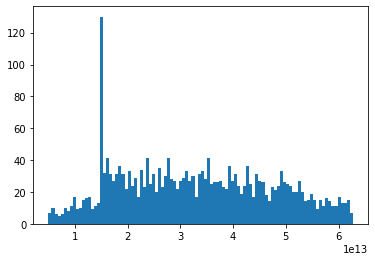

In [20]:
plt.hist(df['d'], bins = 100)
plt.show()

In [11]:
tra = rw.Trajectory(df_time_evolution_observer)
particle_ids = tra.get_particle_ids()
nr_steps = 100
tra.plot_trajectory('x', 'y', 'd', particle_ids[0], nr_steps, None)
tra.plot_trajectory('d', 'z', 'd', particle_ids[0], nr_steps, None)

init trajectory plotting class


IndexError: list index out of range